# ASDS 5303 Deep Learning and Neural Networks Final (Dataset Setup)
## Group Members:
### Henry Berrios #1001392315
### LeMaur Kydd #1001767382



In [58]:
# Import Libraries
import pandas as pd
import numpy as np
from scipy.io import wavfile

import torch
import torch.nn as nn
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Dataset 1

### Title: Drug SMILES Strings and Classifications
### Source: [Research Paper Supporting Information SMILES](https://pubs.acs.org/doi/suppl/10.1021/acs.jcim.9b00236/suppl_file/ci9b00236_si_003.xlsx)
##### Dataset Citation: Meyer, Jesse G.; Liu, Shengchao; Miller, Ian J.; Coon, Joshua J.; Gitter, Anthony (2019). Learning Drug Functions from Chemical Structures with Convolutional Neural Networks and Random Forests. ACS Publications. Collection. https://doi.org/10.1021/acs.jcim.9b00236
##### Dataset Licensing: Free & Open Usage
### Domain: Cheminformatics
### Modality: Text
### Goal: Classification of Drug Type
### Problem Type: Classification
### Target Labels: {antiinfective, antineoplastic, cns, cardio, other}

### Load Dataset 1

In [ ]:
drugs = pd.read_excel('/content/drug_smiles_categories.xlsx') # Read the dataset containing the Drug SMILES Strings and their Drug Categories into a pandas dataframe.

### Peek at Dataset 1

In [ ]:
drugs.head() # Display the first few lines of the dataset

# Here all the features available in the dataset are displayed, but we will attempt to only use SMILES strings to predict the target variable classificaiton.

,CID,HBondAcceptorCount,HBondDonorCount,IsomericSMILES,MolecularWeight,XLogP,drug_class,desalted_SMILES
0,24769,2,0,CN(C)CCCCCCN(C)C.C(CBr)CBr,374.205,NaN,hematologic,BrCCCBr.CN(C)CCCCCCN(C)C
1,134694070,9,6,C1CN=C(N1)NC2=C(C3=NC=CN=C3C=C2)Br.[C@@H](C(C(...,442.226,NaN,cardio,Brc1c(NC2=NCCN2)ccc2nccnc12
2,5121,2,0,C1CSC2=NC(CN21)C3=CC=C(C=C3)Br,283.187,2.5,antiinfective,Brc1ccc(C2CN3CCSC3=N2)cc1
3,4660557,1,1,C1C2CC3CC1CC(C2)C3NC4=CC=C(C=C4)Br,306.247,5.0,cns,Brc1ccc(NC2C3CC4CC(C3)CC2C4)cc1
4,122175,2,2,CC(CCC(C#C)N)N,126.203,-0.4,antineoplastic,C#CC(N)CCC(C)N


In [ ]:
drugs.shape # View the shape of the dataset

(6935, 8)

### Target Variable

In [ ]:
target_variable_counts = drugs.drug_class.value_counts() # Collect the frequency of each unique entry
total = len(drugs) # Track the number of data points in the dataset
percentages = (target_variable_counts / total) * 100 # Calculate the percentage makeup of each category of the target variable

percentages # Display the percentages to assess the distribution of classes

# To improve the balance of the target variable categories, we will group together the last 8 categories into one category called 'Other'.

,count
drug_class,
antiinfective,34.549387
antineoplastic,16.928623
cns,16.452776
cardio,11.348234
antiinflammatory,5.364095
hematologic,3.864456
gastrointestinal,3.677001
lipidregulating,2.364816
reproductivecontrol,2.134102


### Dataset 1 Target Variable Distribution

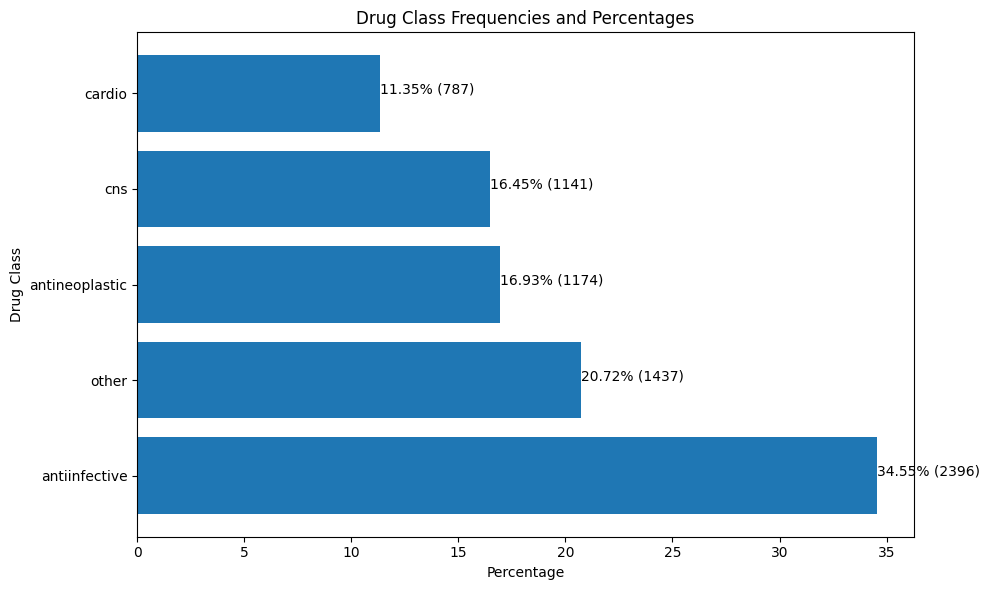

In [ ]:
# CODE FOR PLOT BELOW GENERATED BY GEMINI AI

# prompt: horizontal bar plot showing the frequencies and percentages of the drugs.drug_class column grouping the 8 smallest classes into one class called "other"

import matplotlib.pyplot as plt
# Group the 8 smallest classes into one class called "other"
threshold = percentages.sort_values().iloc[7]  # Find threshold for the 8th smallest class
other_classes = percentages[percentages <= threshold].index.tolist()
drugs.loc[drugs['drug_class'].isin(other_classes), 'drug_class'] = 'other'


# Recalculate frequencies and percentages
target_variable_counts = drugs.drug_class.value_counts()
total = len(drugs)
percentages = (target_variable_counts / total) * 100

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(percentages.index, percentages.values)
plt.xlabel('Percentage')
plt.ylabel('Drug Class')
plt.title('Drug Class Frequencies and Percentages')

# Add frequency labels to the bars
for index, value in enumerate(percentages.values):
    plt.text(value, index, f"{value:.2f}% ({target_variable_counts.iloc[index]})")

plt.tight_layout()
plt.show()


# Dataset 2

### Title: First 6 Seconds
### Source: [Kaggle](https://www.kaggle.com/datasets/louisteitelbaum/911-recordings-first-6-seconds)
##### Dataset Citation: [LINK](https://www.kaggle.com/datasets/louisteitelbaum/911-recordings-first-6-seconds)
##### Dataset Licensing: CC0: Public Domain
### Domain: Police & Emergency Services
### Modality: Audio
### Goal: Binary Classification of Call Severity
### Problem Type: Classification
### Target Labels: {1.0 - Serious Incident/Lives in Danger, 0.0 - Not Serious/No Lives in Danger}


### Load Dataset 2

In [60]:
audio_metadata = pd.read_csv('/content/911_metadata.csv') # Read the dataset containing the audio metadata into a pandas dataframe.
samplerate, data = wavfile.read('/content/call_100_0.wav') # Read in the selected sample .wav file separating the sample rate and the data

In [72]:
audio_metadata.shape

(710, 13)

### Peek at Dataset 2

In [61]:
audio_metadata.head() # Display the first few lines of the dataset

,id,event_id,link,title,date,state,deaths,potential_death,false_alarm,description,deaths_binary,break,filename
0,0,2,https://web.archive.org/web/20150417085342/htt...,Detroit Child’s 911 Call – audio,2/06,Michigan,1.0,1.0,0.0,– In Feb. 2006 5 year-old Robert Turner called...,1,13.0,911_first6sec/call_2_0.wav
1,1,8,https://web.archive.org/web/20150417085342/htt...,Girl’s Murder 911 Call,3/05,Florida,2.0,1.0,0.0,– the 911 call of a lifetime. Volusia County (...,1,3.0,911_first6sec/call_8_0.wav
2,2,9,https://web.archive.org/web/20150417085342/htt...,‘Shoot Her?’ 911 call,4/05,Texas,0.0,0.0,1.0,– caller reports her daughter is creating a di...,0,2.0,911_first6sec/call_9_0.wav
3,3,10,https://web.archive.org/web/20150417085342/htt...,Snowstorm 911 Call,1/05,Nebraska,2.0,1.0,0.0,– a couple under the influence of drugs dialed...,1,0.0,911_first6sec/call_10_0.wav
4,4,11,https://web.archive.org/web/20150417085342/htt...,911 Call for a Date,1/06,Oregon,0.0,0.0,1.0,– Lorna Jeanne Dudash in Aloha (Ore.) dialed 9...,0,2.0,911_first6sec/call_11_0.wav


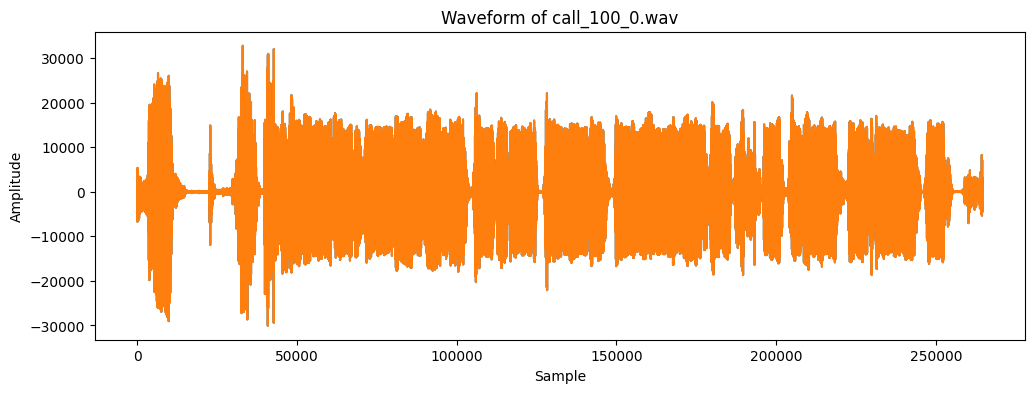

In [74]:
# CODE FOR PLOT BELOW GENERATED BY GEMINI AI

# prompt: i want to visualize my wavefile

# Plot the waveform
plt.figure(figsize=(12, 4))
plt.plot(data)
plt.title('Waveform of call_100_0.wav')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()


### Dataset 2 Target Variable Distribution

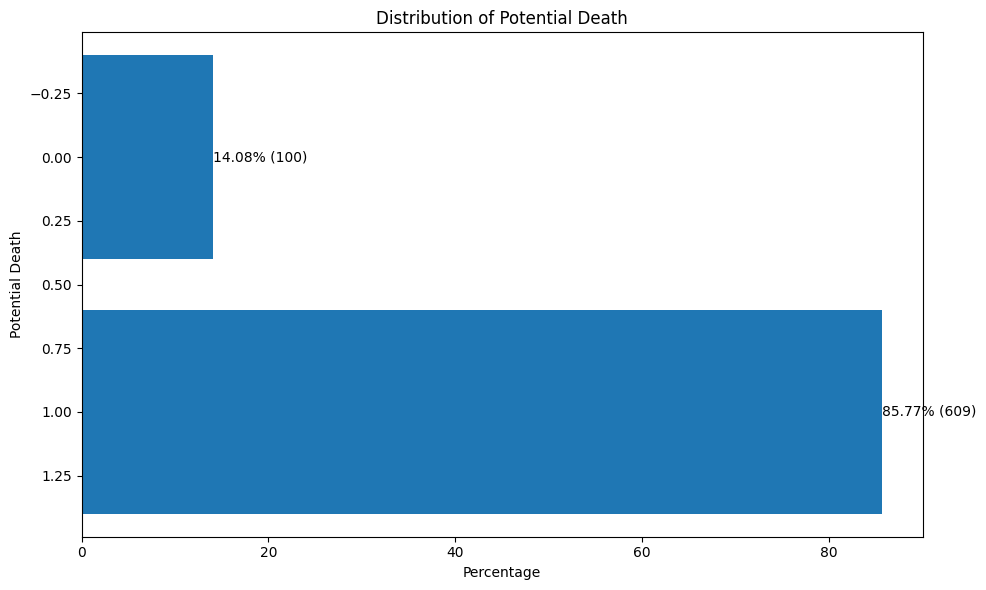

In [69]:
# CODE FOR PLOT BELOW GENERATED BY GEMINI AI

# prompt: create bar plot of the audio_metadata.potential_death column to show the distribution of the target variable show percentages and frequencies reverse the order of the bars, smallest at the left

# Calculate frequencies and percentages
target_variable_counts = audio_metadata['potential_death'].value_counts()
total = len(audio_metadata)
percentages = (target_variable_counts / total) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(percentages.index, percentages.values)

plt.xlabel('Percentage')
plt.ylabel('Potential Death')
plt.title('Distribution of Potential Death')

# Add frequency labels to the bars
for bar, percentage, freq in zip(bars, percentages.values, target_variable_counts.values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{percentage:.2f}% ({freq})",
             va='center', ha='left')

# Reverse the order of bars
plt.gca().invert_yaxis()


plt.tight_layout()
plt.show()


# Dataset 3

### Title: TBI-NDSC
### Source: [Traumatic Brain Injury Model Systems National Data and Statistical Center](https://www.tbindsc.org/)
##### Dataset Citation: 10.17605/OSF.IO/A4XZB
##### Dataset Licensing: Public Use By Data Request
### Domain: Health Informatics
### Modality: Tabular
### Goal: Predict the Disability Rating Scale (DRSd) score at discharge using pre-injury, injury-related, and hospitilization factors
### Problem Type: Regression Task
### Target Labels: Disability Rating Scale (DRSd)
### Importance:
 - Helps predict overall functional recovery post-TBI.
 - Allows clinicians to develop rehabiliation plans centered around the patient.
 - Supports early intervention for patients at high risk of functional disability.


### Load Dataset 3

In [ ]:
# loading the dataset from google drive
file_path1 = '/content/TBIMSForm1_Public_20240405.csv' # path to the dataset that has admission/intake information

# initial intake/admission dataset
tbi1 = pd.read_csv(file_path1, low_memory = False) # read csv file containing the admission/intake information into a dataframe

### Preprocessing for TBI1 and TBI2

In [ ]:
# tbi1 only keeping important columns (taken from local device as colab was having trouble saving my previous written code)
tbi1_adm = tbi1[['SexF', 'Race', 'EthnicityF', 'Mar', 'EduYears', 'Emp1', 'PreconImpair', 'PreconPhys', 'PrelimLearn', 'PrelimDress', 'PrelimOuthm', 'PrelimWork', 'SCI', 'Cause', 'CTComp',
                 'CTIntracrain', 'CTPunctate', 'CTSubarachnioid', 'CTIntraventricular', 'CTFrag', 'GCSEye', 'GCSVer', 'GCSMot', 'PTAMethod', 'DRSEyeA', 'DRSVerA', 'DRSMotA', 'DRSFeedA',
                 'DRSToiletA', 'DRSGroomA', 'DRSFuncA', 'DRSEmpA', 'FIMCompA', 'FIMExpressA', 'FIMSocialA', 'FIMProbSlvA', 'FIMMemA', 'Craniotomy', 'AcutePay1', 'RehabPay1', 'Drugs', 'DAYStoACUTEadm',
                 'DAYStoACUTEdc', 'DAYStoREHABadm', 'DAYStoREHABdc', 'DRSa', 'DRSd', 'FIMMOTA', 'FIMCOGA', 'FIMTOTA', 'LOSACUTE', 'LOSRehab' ]] # keeping important demographics and rehab info

### Removing Missing Values and Changing Data Types

In [ ]:
# observing the data types of the dataset
tbi1_adm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19185 entries, 0 to 19184
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SexF                19185 non-null  object 
 1   Race                19185 non-null  object 
 2   EthnicityF          19185 non-null  object 
 3   Mar                 19185 non-null  object 
 4   EduYears            19185 non-null  object 
 5   Emp1                19185 non-null  object 
 6   PreconImpair        19185 non-null  object 
 7   PreconPhys          19185 non-null  object 
 8   PrelimLearn         19185 non-null  object 
 9   PrelimDress         19185 non-null  object 
 10  PrelimOuthm         19185 non-null  object 
 11  PrelimWork          19185 non-null  object 
 12  SCI                 19185 non-null  object 
 13  Cause               19185 non-null  object 
 14  CTComp              19185 non-null  object 
 15  CTIntracrain        19185 non-null  object 
 16  CTPu

In [ ]:
# changing the columns to float before removing NaN values
tbi1_adm = tbi1_adm.apply(pd.to_numeric, errors = 'coerce')

In [ ]:
# replacing placeholder values that are coded as missing with NaN
place_holders = [66, 77, 88, 99, 888, 999] # defining the placeholder values
tbi1_adm = tbi1_adm.replace(place_holders, np.nan) # replacing these placeholdesr with NaN

In [ ]:
# removing all NaN values
tbi1_adm = tbi1_adm.dropna()

In [ ]:
# checking the dataset a final time
tbi1_adm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8614 entries, 3 to 18243
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SexF                8614 non-null   float64
 1   Race                8614 non-null   float64
 2   EthnicityF          8614 non-null   float64
 3   Mar                 8614 non-null   float64
 4   EduYears            8614 non-null   float64
 5   Emp1                8614 non-null   float64
 6   PreconImpair        8614 non-null   float64
 7   PreconPhys          8614 non-null   float64
 8   PrelimLearn         8614 non-null   float64
 9   PrelimDress         8614 non-null   float64
 10  PrelimOuthm         8614 non-null   float64
 11  PrelimWork          8614 non-null   float64
 12  SCI                 8614 non-null   float64
 13  Cause               8614 non-null   float64
 14  CTComp              8614 non-null   float64
 15  CTIntracrain        8614 non-null   float64
 16  CTPunctate

### Peek at Dataset 3

In [ ]:
# checking first 5 rows of the dataset
tbi1_adm.head()

,SexF,Race,EthnicityF,Mar,EduYears,Emp1,PreconImpair,PreconPhys,PrelimLearn,PrelimDress,...,DAYStoACUTEdc,DAYStoREHABadm,DAYStoREHABdc,DRSa,DRSd,FIMMOTA,FIMCOGA,FIMTOTA,LOSACUTE,LOSRehab
3,1.0,1.0,0.0,5.0,16.0,9.0,0.0,0.0,0.0,0.0,...,13.0,13.0,30.0,11.0,5.0,27.0,15.0,42.0,13.0,17.0
5,1.0,1.0,0.0,1.0,15.0,5.0,0.0,0.0,0.0,0.0,...,12.0,12.0,19.0,14.0,8.0,55.0,24.0,79.0,12.0,7.0
7,2.0,1.0,0.0,2.0,20.0,5.0,0.0,0.0,0.0,0.0,...,3.0,3.0,18.0,6.0,4.0,39.0,18.0,57.0,3.0,15.0
11,2.0,5.0,1.0,1.0,12.0,5.0,0.0,0.0,0.0,0.0,...,16.0,16.0,24.0,10.0,7.0,39.0,24.0,63.0,16.0,8.0
12,2.0,1.0,0.0,1.0,12.0,2.0,0.0,0.0,1.0,0.0,...,17.0,17.0,52.0,7.0,4.0,30.0,21.0,51.0,17.0,35.0


### Dataset 3 Target Variable

In [ ]:
# displaying only our target variable of interest, the DRS
tbi1_adm[['DRSd']].head(10) # observing the first 10 rows of the target variable of interest

,DRSd
3,5.0
5,8.0
7,4.0
11,7.0
12,4.0
13,5.0
14,6.0
16,6.0
18,7.0
20,5.0


### Dataset 3 Target Variable Distribution

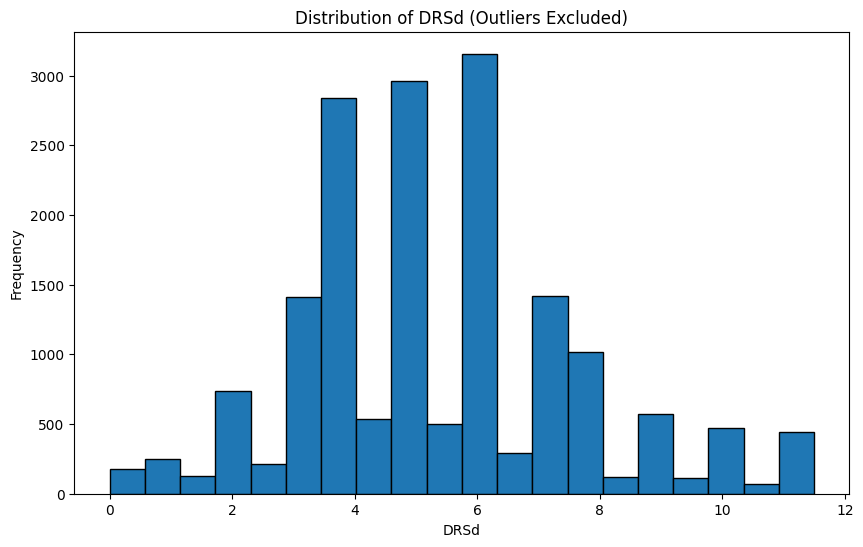

In [56]:
# CODE FOR PLOT BELOW GENERATED BY GEMINI AI

# prompt: plot histogram of tbi1_adm[['DRSd']] column to show the distribution of this target variable, exclude outliers

import matplotlib.pyplot as plt
# Calculate the first and third quartiles
Q1 = tbi1_adm['DRSd'].quantile(0.25)
Q3 = tbi1_adm['DRSd'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
tbi1_adm_filtered = tbi1_adm[(tbi1_adm['DRSd'] >= lower_bound) & (tbi1_adm['DRSd'] <= upper_bound)]

# Plot the histogram of the filtered data
plt.figure(figsize=(10, 6))
plt.hist(tbi1_adm_filtered['DRSd'], bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('DRSd')
plt.ylabel('Frequency')
plt.title('Distribution of DRSd (Outliers Excluded)')
plt.show()
